First five rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


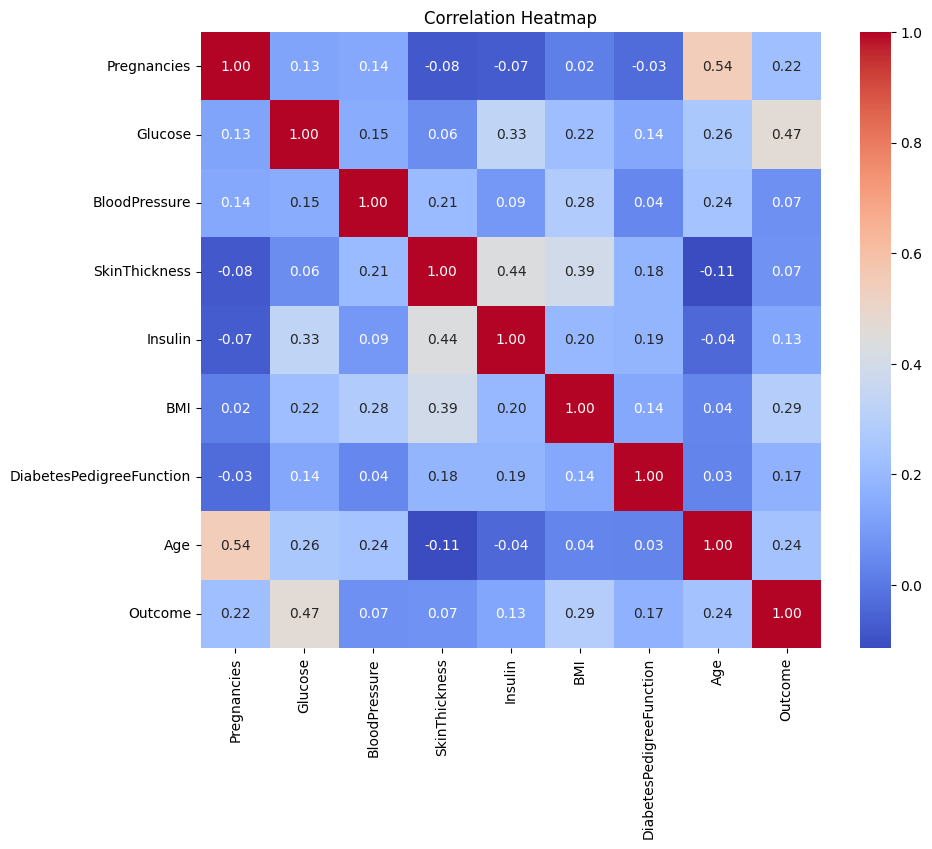


Accuracy BEFORE normalization: 0.7207792207792207

Confusion Matrix BEFORE normalization:
 [[88 12]
 [31 23]]

Classification Report BEFORE normalization:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



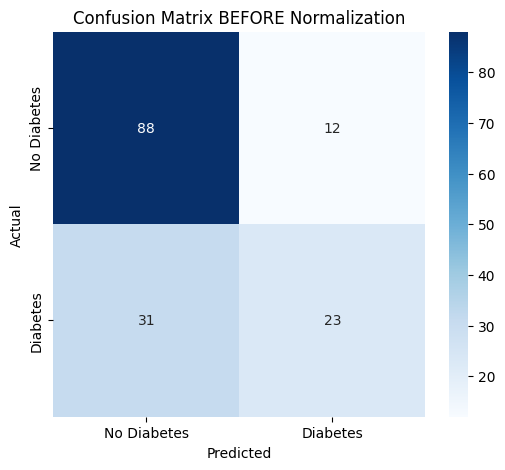


Accuracy AFTER normalization: 0.7532467532467533

Confusion Matrix AFTER normalization:
 [[83 17]
 [21 33]]

Classification Report AFTER normalization:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



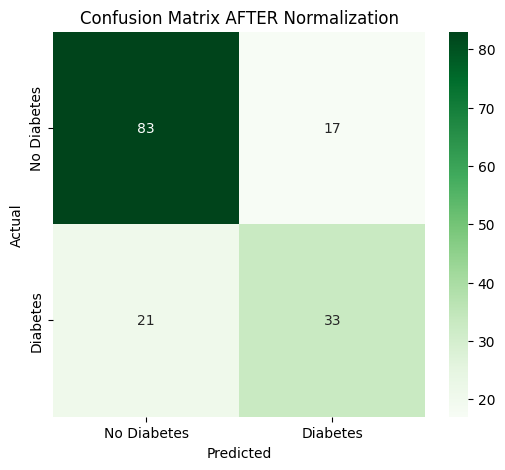

In [1]:
# --- IMPORTS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- STEP 1: Load dataset ---
# Use your uploaded file name
data = pd.read_csv('diabetes.csv')

print("First five rows of the dataset:")
print(data.head())

# --- STEP 2: Correlation heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# --- STEP 3: Split features and target ---
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- STEP 4: Train and evaluate BEFORE normalization ---
svc_before = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_before.fit(X_train, y_train)
y_pred_before = svc_before.predict(X_test)

cm_before = confusion_matrix(y_test, y_pred_before)
print("\nAccuracy BEFORE normalization:", accuracy_score(y_test, y_pred_before))
print("\nConfusion Matrix BEFORE normalization:\n", cm_before)
print("\nClassification Report BEFORE normalization:\n",
      classification_report(y_test, y_pred_before))

plt.figure(figsize=(6,5))
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title('Confusion Matrix BEFORE Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- STEP 5: Normalize AFTER splitting ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- STEP 6: Train and evaluate AFTER normalization ---
svc_after = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_after.fit(X_train_scaled, y_train)
y_pred_after = svc_after.predict(X_test_scaled)

cm_after = confusion_matrix(y_test, y_pred_after)
print("\nAccuracy AFTER normalization:", accuracy_score(y_test, y_pred_after))
print("\nConfusion Matrix AFTER normalization:\n", cm_after)
print("\nClassification Report AFTER normalization:\n",
      classification_report(y_test, y_pred_after))

plt.figure(figsize=(6,5))
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title('Confusion Matrix AFTER Normalization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
